<a href="https://colab.research.google.com/github/Pakhi27/Fourier-Transform-Time-to-frequency-Domain./blob/main/Fourier_Transform_Time_to_frequency_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# load audio file in the player
audio_path = "/content/drive/MyDrive/StarWars3.wav"
ipd.Audio(audio_path)

In [ ]:

# load audio file
signal, sr = librosa.load(audio_path)

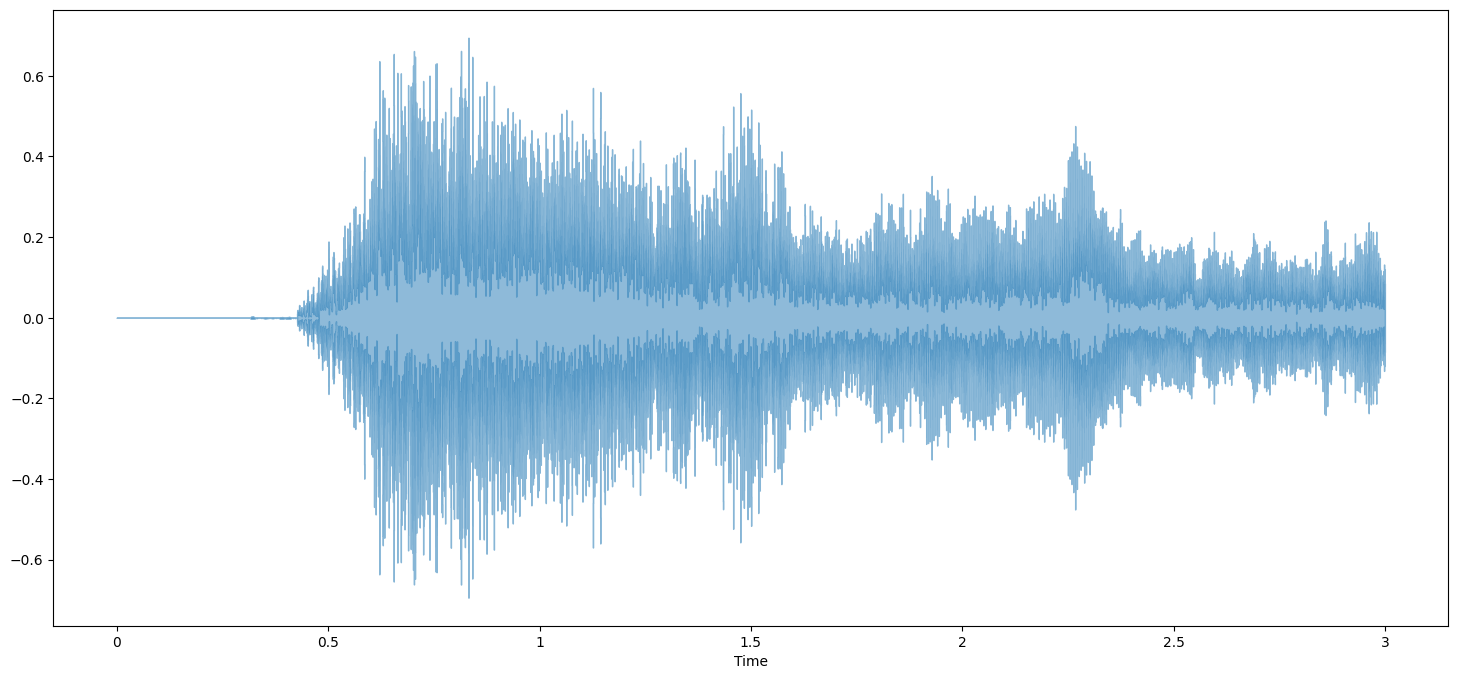

In [9]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [10]:
# derive spectrum using FT
# fft-fast fourier transform
#absolute-magnitude-y-axis
#frequency-x-axis-0hz and sampling rate
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

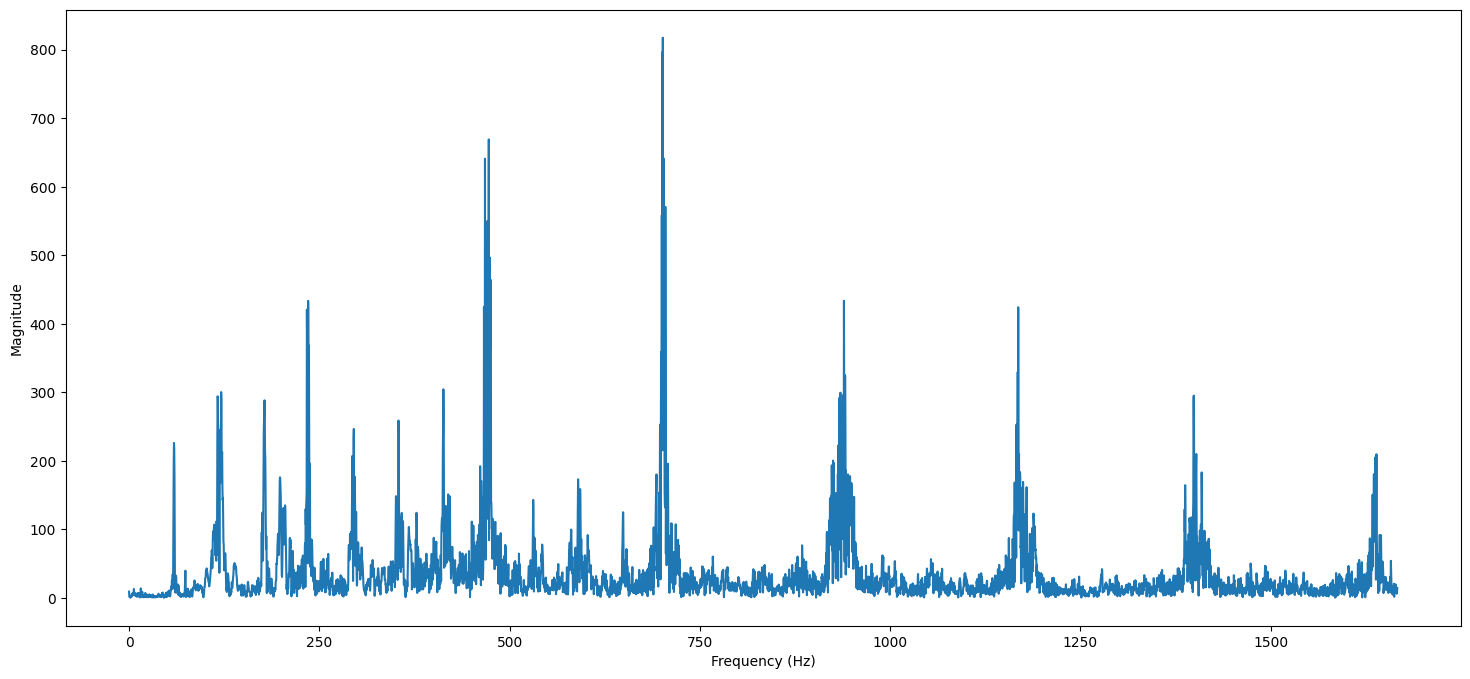

In [11]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
# peak at 700 hz-magnitude-800-fundamental

In [12]:
len(signal)

66150

In [13]:
#sample duration
d =  1 / sr
d


4.5351473922902495e-05

In [14]:
#duration for fundamental frequency
d_700 = 1 / 700
d_700

0.0014285714285714286

In [15]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

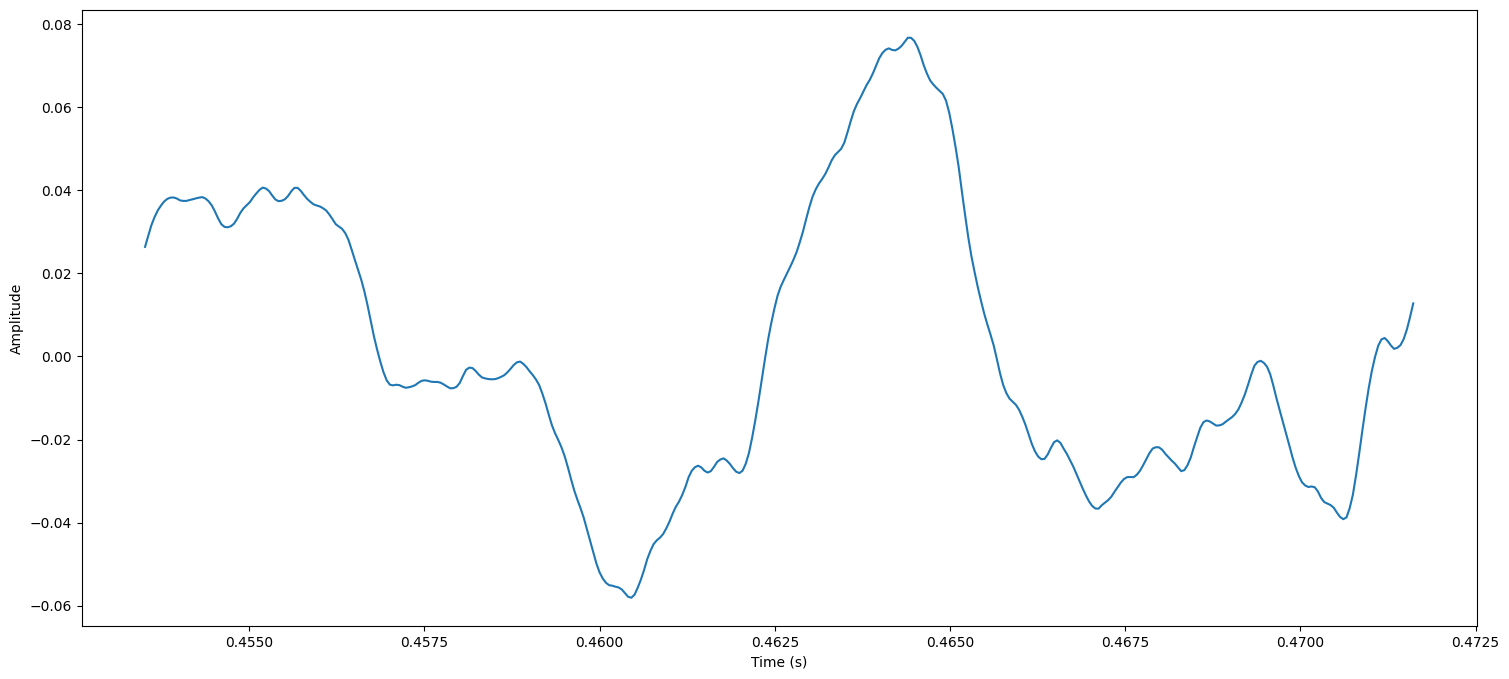

In [29]:
# zomming in to the waveform
#only 400 samples

samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#compare the signal with sinusoids at diiffrent frequencies and find similarity

In [30]:
import numpy as np

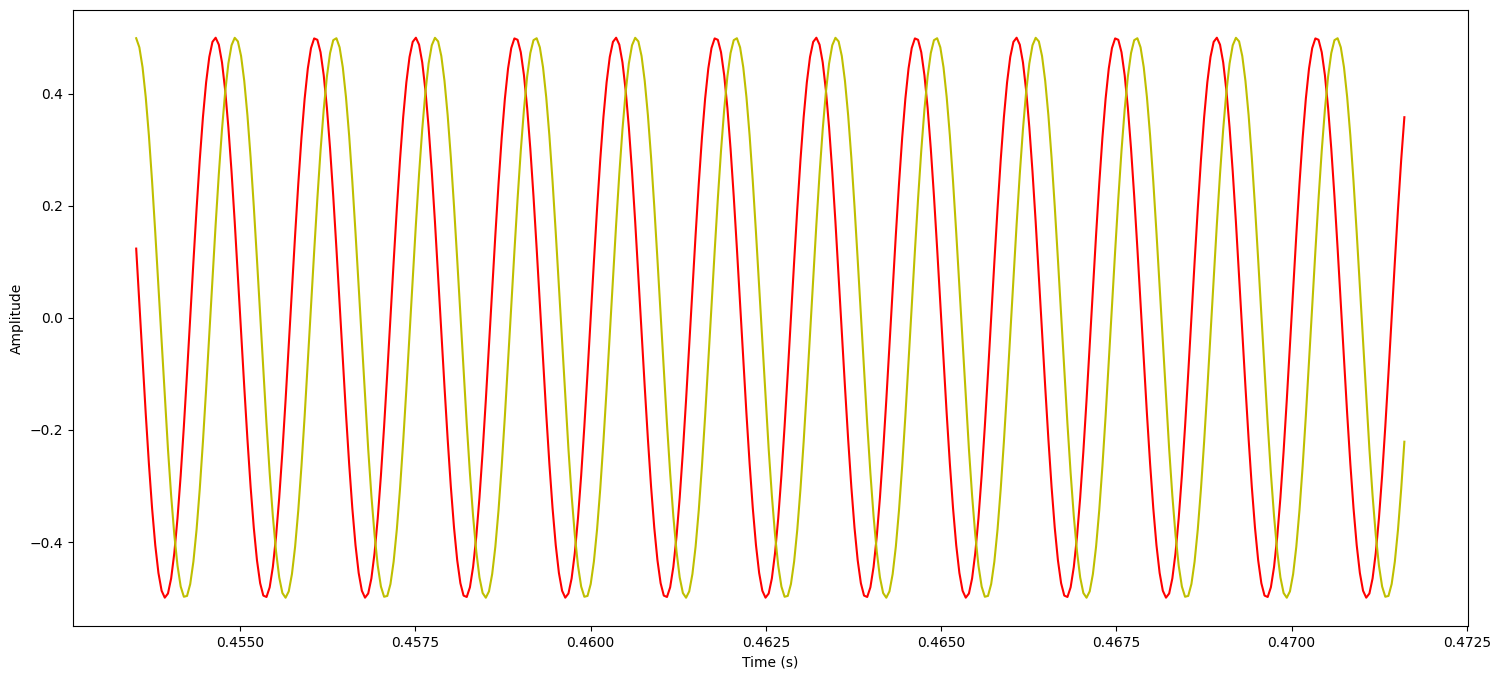

In [31]:
# create a sinusoid

# fundamental frequency(angular frequency-omega)
f = 700
phase = 0
phase2 = 0.2
# if phase 2 keeps becoming higher both of the functions are aligned

# 2 sinusoids
# sin(2*pie.(wt-phi))
sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

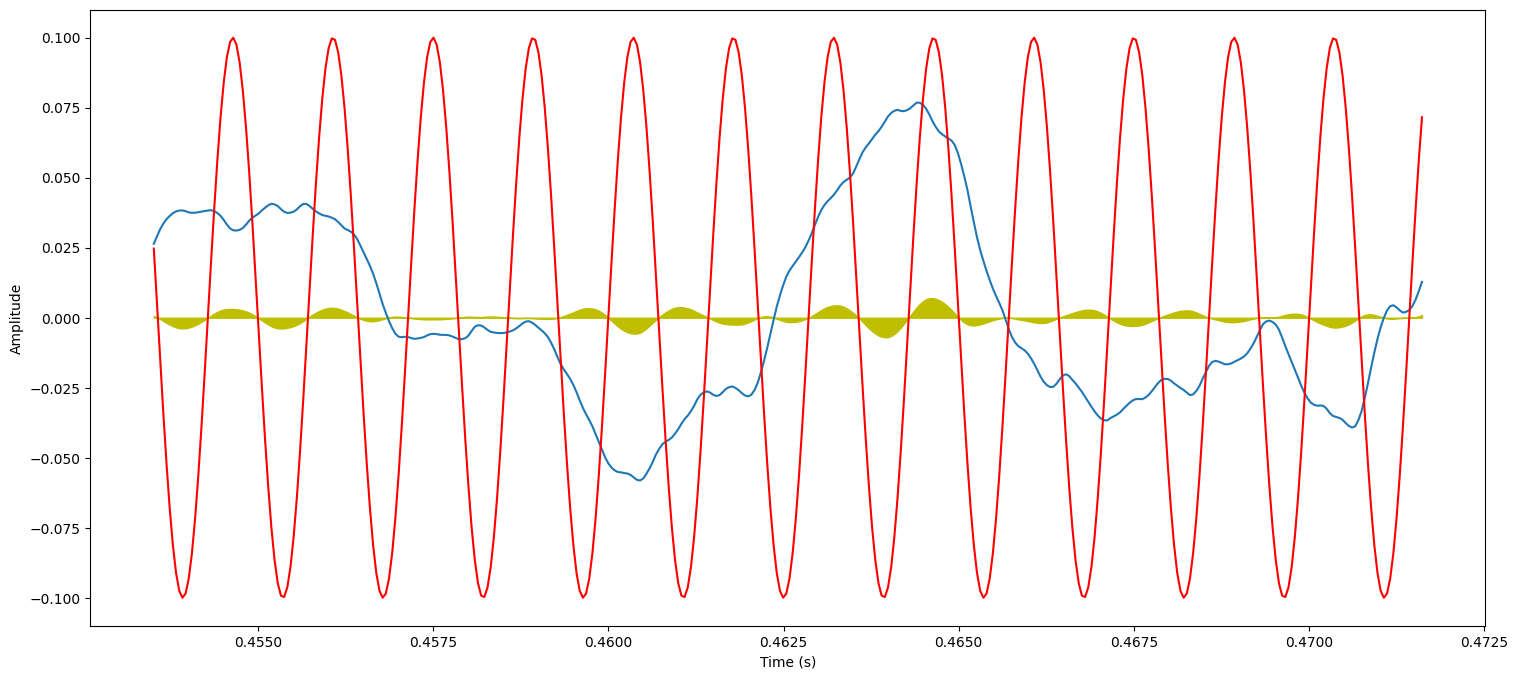

In [32]:
# compare signal and sinusoids

f = 700
phase = 1

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

#to find similarity multiply the two signals and use the fill between 2 signals -higher area between 2 signals implies higher similarity between signal and sinusoids
#after multiplying both the signal and the sinusoid:-
# if both positive or both negative-positive area
# if alternative-negative area
# positive area and negative area-tells how much similar they both are
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


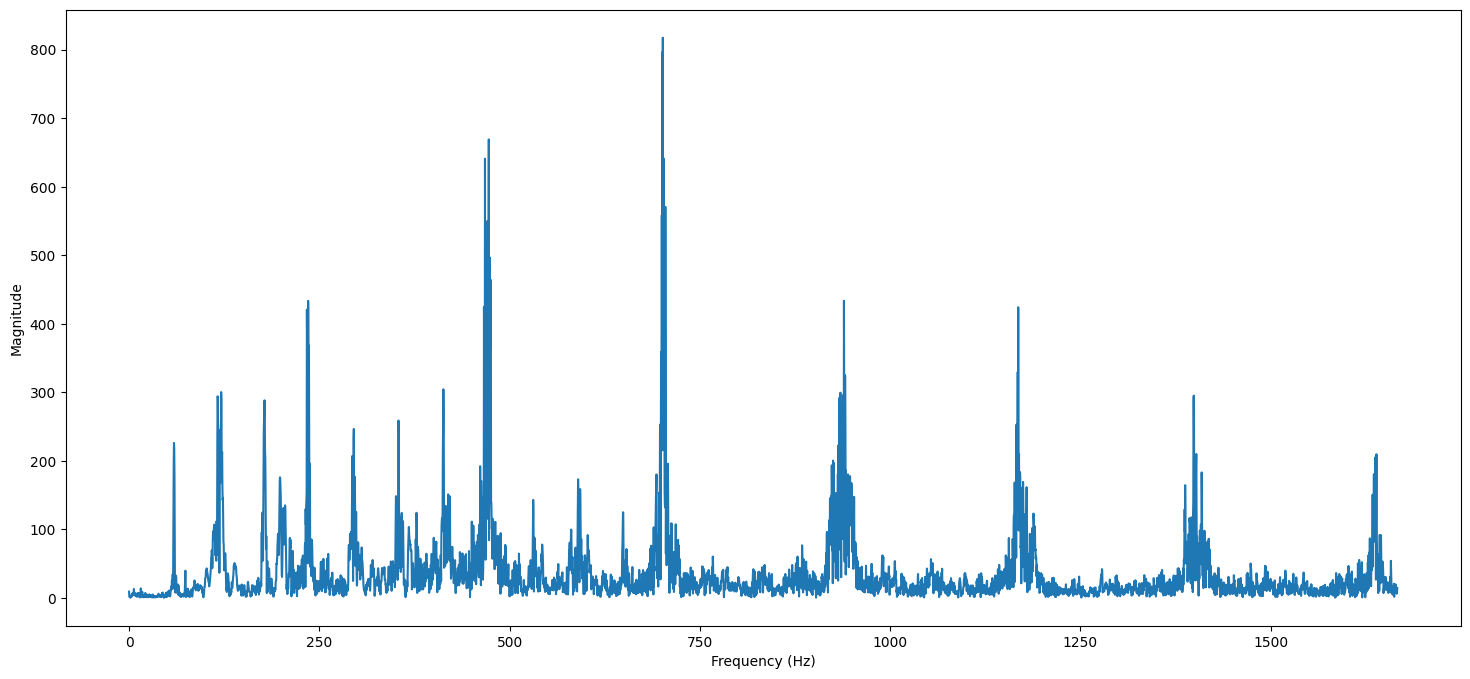

In [33]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

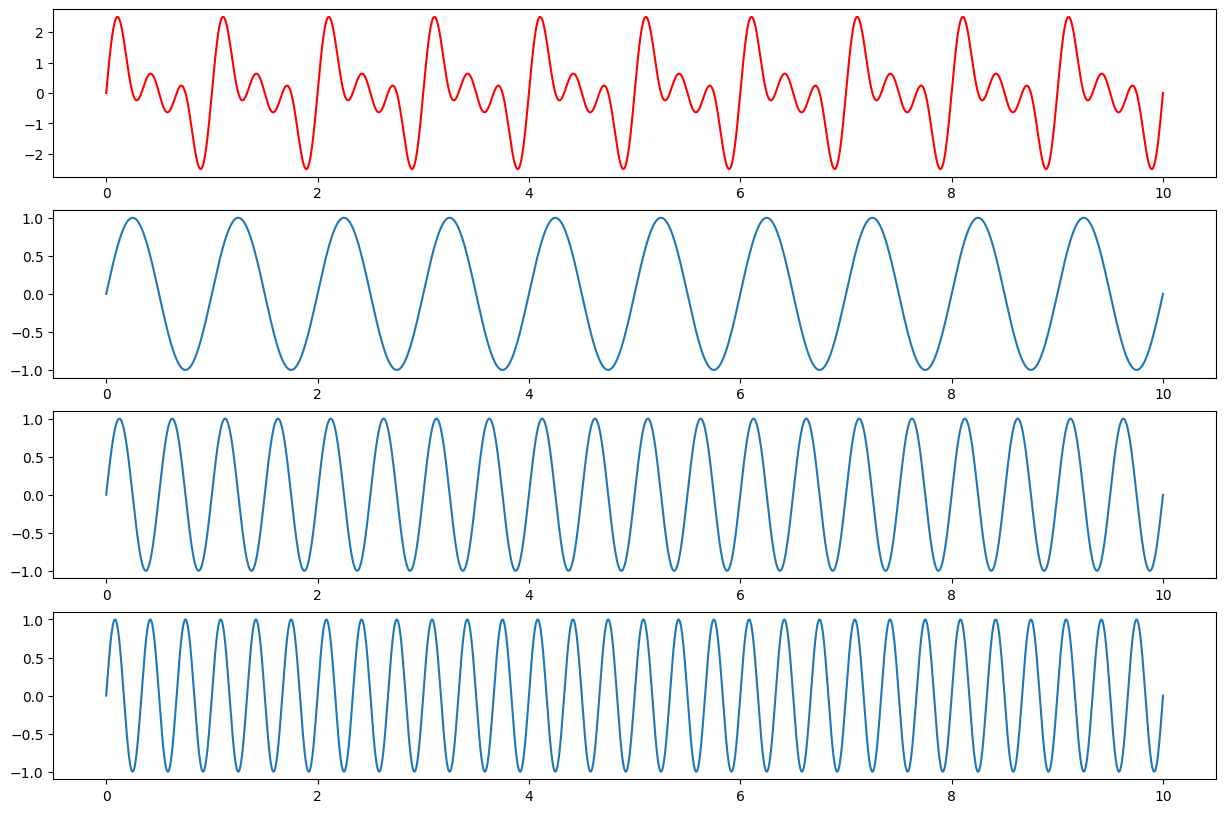

In [34]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()
